Early Diagnosis of Alzheimer’s Disease using MRI Images

        
        Niharika Padmanabhan - AM.EN.U4CSE19338
        

Dataset: https://www.kaggle.com/tourist55/alzheimers-dataset-4-class-of-images

In [ ]:
import os
import torch
import torchvision
from torchvision import datasets, transforms, models
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision.transforms.functional as TF
import torch.optim.lr_scheduler as lr_sh

import time
import copy

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

import PIL
from PIL import Image

import matplotlib.pyplot as plt
import numpy as np

##Dataset Loading

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kasthuriasnair","key":"a451094c94e7c090965045547400b984"}'}

In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d 'tourist55/alzheimers-dataset-4-class-of-images'

 70% 24.0M/34.1M [00:00<00:00, 51.1MB/s]
100% 34.1M/34.1M [00:00<00:00, 98.2MB/s]


In [ ]:
!unzip alzheimers-dataset-4-class-of-images

Streaming output truncated to the last 5000 lines.
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem207.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem208.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem209.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem21.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem210.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem211.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem212.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem213.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem214.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem215.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem216.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem217.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/mildDem218.jpg  
  inflating: Alzheimer_s Dataset/train/MildDemented/m

##Data Augumentation

In [ ]:
rh = transforms.RandomHorizontalFlip()
rv = transforms.RandomVerticalFlip()
cj = transforms.ColorJitter(brightness=0.8, contrast=0, saturation=0, hue=0)
cj1 = transforms.ColorJitter(brightness=0, contrast=0, saturation=0.3, hue=0)
cj2 = transforms.ColorJitter(brightness=1.2, contrast=0, saturation=0, hue=0)

gr = transforms.Grayscale(num_output_channels=3)


path = '/content/Alzheimer_s Dataset/train/ModerateDemented'

for img in os.listdir(path):

  img_path = path+'/'+img # Making image file path
  n = len(img)
  imp = img[:(n-4)]

  im = Image.open(img_path)

  im1 = rh(im)
  fp = path + '/' + imp + 't1' +  '.jpg'
  im1.save(fp)

  im2 = rv(im)
  fp = path + '/' + imp + 't2' +  '.jpg'
  im2.save(fp)

  im3 = cj(im)
  fp = path + '/' + imp + 't3' +  '.jpg'
  im3.save(fp)

  im4 = cj1(im)
  fp = path + '/' + imp + 't4' +  '.jpg'
  im4.save(fp)

  im6 = cj2(im)
  fp = path + '/' + imp + 't6' +  '.jpg'
  im6.save(fp)

  im5 = gr(im)
  fp = path + '/' + imp + 't5' +  '.jpg'
  im5.save(fp)

path = '/content/Alzheimer_s Dataset/train/MildDemented'

for img in os.listdir(path):

  img_path = path+'/'+img # Making image file path
  n = len(img)
  imp = img[:(n-4)]

  im = Image.open(img_path)

  im1 = rh(im)
  fp = path + '/' + imp + 't1' +  '.jpg'
  im1.save(fp)

  im2 = rv(im)
  fp = path + '/' + imp + 't2' +  '.jpg'
  im2.save(fp)

  im3 = cj(im)
  fp = path + '/' + imp + 't3' +  '.jpg'
  im3.save(fp)

  im5 = gr(im)
  fp = path + '/' + imp + 't5' +  '.jpg'
  im5.save(fp)

path = '/content/Alzheimer_s Dataset/test/ModerateDemented'

for img in os.listdir(path):

  img_path = path+'/'+img # Making image file path
  n = len(img)
  imp = img[:(n-4)]

  im = Image.open(img_path)

  im1 = rh(im)
  fp = path + '/' + imp + 't1' +  '.jpg'
  im1.save(fp)

  im2 = rv(im)
  fp = path + '/' + imp + 't2' +  '.jpg'
  im2.save(fp)

  im3 = cj(im)
  fp = path + '/' + imp + 't3' +  '.jpg'
  im3.save(fp)


  im4 = cj1(im)
  fp = path + '/' + imp + 't4' +  '.jpg'
  im4.save(fp)

  im6 = cj2(im)
  fp = path + '/' + imp + 't6' +  '.jpg'
  im6.save(fp)

  im5 = gr(im)
  fp = path + '/' + imp + 't5' +  '.jpg'
  im5.save(fp)


path = '/content/Alzheimer_s Dataset/test/MildDemented'

for img in os.listdir(path):

  img_path = path+'/'+img # Making image file path
  n = len(img)
  imp = img[:(n-4)]

  im = Image.open(img_path)

  im1 = rh(im)
  fp = path + '/' + imp + 't1' +  '.jpg'
  im1.save(fp)

  im2 = rv(im)
  fp = path + '/' + imp + 't2' +  '.jpg'
  im2.save(fp)

  im3 = cj(im)
  fp = path + '/' + imp + 't3' +  '.jpg'
  im3.save(fp)

  im5 = gr(im)
  fp = path + '/' + imp + 't5' +  '.jpg'
  im5.save(fp)

##Dataset making it iterable

In [ ]:
transform_train = transforms.Compose([
    transforms.Resize((224,224)),
    # transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0, saturation=0, hue=0),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
transform_test = transforms.Compose([
    transforms.Resize((224,224)),
    # transforms.CenterCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.ColorJitter(brightness=0.4, contrast=0, saturation=0, hue=0),
    # transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [ ]:
labels_name = os.listdir("/content/Alzheimer_s Dataset/train")
print (labels_name)

['ModerateDemented', 'VeryMildDemented', 'NonDemented', 'MildDemented']


In [ ]:
train_set=datasets.ImageFolder("/content/Alzheimer_s Dataset/train",transform=transform_train)

In [ ]:
test_set=datasets.ImageFolder("/content/Alzheimer_s Dataset/test",transform=transform_test)

In [ ]:
print(train_set)

Dataset ImageFolder
    Number of datapoints: 8301
    Root location: /content/Alzheimer_s Dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ColorJitter(brightness=[0.6, 1.4], contrast=None, saturation=None, hue=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [ ]:
print(test_set)

Dataset ImageFolder
    Number of datapoints: 2067
    Root location: /content/Alzheimer_s Dataset/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ColorJitter(brightness=[0.6, 1.4], contrast=None, saturation=None, hue=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [ ]:
print(train_set)

Dataset ImageFolder
    Number of datapoints: 8301
    Root location: /content/Alzheimer_s Dataset/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=None)
               RandomHorizontalFlip(p=0.5)
               ColorJitter(brightness=[0.6, 1.4], contrast=None, saturation=None, hue=None)
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [ ]:
batch_size = 8

In [ ]:
dataset = torch.utils.data.ConcatDataset([train_set, test_set])
# dataset = datasets.ImageFolder("/content/Alzheimer_s Dataset/train",transform=transform_train)

In [ ]:
train_set,test_set = torch.utils.data.random_split(dataset, [8294,2074])

In [ ]:
data_dict = {'train' : torch.utils.data.DataLoader(dataset = train_set, batch_size = batch_size, shuffle = True),
'val' : torch.utils.data.DataLoader(dataset = test_set, batch_size = batch_size, shuffle = True)}

In [ ]:
dataiter = iter(data_dict['train'])
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([8, 3, 224, 224])
torch.Size([3, 224, 224])
0


##Image visualisation

In [ ]:
def imshow(img, title):
    npimg = img.numpy() / 2 + 0.5
    plt.figure(figsize=(batch_size, 1))
    plt.axis('off')
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(title)
    plt.show()

In [ ]:
def show_batch_images(dataloader):
    images, labels = next(iter(dataloader))
    img = torchvision.utils.make_grid(images)
    imshow(img, title=[str(x.item()) for x in labels])

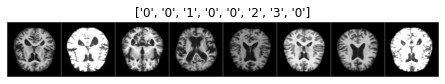

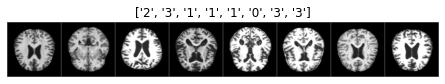

In [ ]:
for i in range(2):
    show_batch_images(data_dict['train'])

##Squeezenet

In [ ]:
num_classes = 4
num_epochs = 20
lra = 0.0003
feature_extract = True

In [ ]:
def train_model(model, dataloaders, criterion, optimizer, num_epochs=25):
    since = time.time()

    val_acc_history = []
    lr_hist=[]
    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        lr = optimizer.param_groups[0]['lr']
        print('lr in epoch {} is {}'.format(epoch,lr))
        lr_hist.append(lr)
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:

            running_loss = 0.0
            running_corrects = 0

            if phase == 'train':

              model.train()  # Set model to training mode
            else:
              model.eval()   # Set model to evaluate mode

            # Iterate over data
            for inputs,labels in dataloaders[phase]:
              inputs = inputs.to(device)
              labels = labels.to(device)

              # zero the parameter gradients
              optimizer.zero_grad()

              # forward
              # track history if only in train
              with torch.set_grad_enabled(phase == 'train'):
                  # Get model outputs and calculate loss

                  outputs = model(inputs)
                  loss = criterion(outputs, labels)

                  _, preds = torch.max(outputs, 1)

                  # backward + optimize only if in training phase
                  if phase == 'train':
                    loss.backward()
                    optimizer.step()


              # statistics
              running_loss += loss.item() * inputs.size(0)
              running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / len(dataloaders[phase].dataset)
            epoch_acc = running_corrects.double() / len(dataloaders[phase].dataset)

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

            if phase == 'val':
                val_acc_history.append(epoch_acc)

        print()
        # scheduler1.step()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
    model.load_state_dict(best_model_wts)
    return model, val_acc_history,lr_hist

In [ ]:
def test_model(model, dataloaders, criterion):

  running_corrects=0

  predicted=[]
  expected=[]
   # Iterate over data
  for inputs,labels in dataloaders:
    inputs = inputs.to(device)
    labels = labels.to(device)

    outputs = model(inputs)
    loss = criterion(outputs, labels)

    _, preds = torch.max(outputs, 1)
    ops = preds.cpu().detach().numpy()
    ls = labels.cpu().detach().numpy()
    predicted.extend(ops)
    expected.extend(ls)



    running_corrects += torch.sum(preds == labels.data)

  acc = running_corrects.double() / len(dataloaders.dataset)

  return predicted,expected



In [ ]:
def set_parameter_requires_grad(net, feature_extracting):
    if feature_extracting:
        count=0
    for param in net.parameters():
        count +=1
        if count < 16: #freezing first 3 layers
          param.requires_grad = False

In [ ]:
def initialize_model(num_classes, feature_extract, use_pretrained=True):

    model_ft = models.squeezenet1_0(pretrained=use_pretrained)
    set_parameter_requires_grad(model_ft, feature_extract)
    model_ft.classifier[0]=nn.Dropout(p=0.5)
    model_ft.classifier[1] = nn.Conv2d(512, num_classes, kernel_size=(1,1), stride=(1,1))
    model_ft.num_classes = num_classes

    return model_ft


In [ ]:

# Initialize the model
model_ft = initialize_model(num_classes, feature_extract, use_pretrained=True)

# Print the model we just instantiated
# print(model_ft)

Downloading: "https://download.pytorch.org/models/squeezenet1_0-b66bff10.pth" to /root/.cache/torch/hub/checkpoints/squeezenet1_0-b66bff10.pth


  0%|          | 0.00/4.78M [00:00<?, ?B/s]

In [ ]:
# Send the model to GPU
model_ft = model_ft.to(device)

params_to_update = model_ft.parameters()

print("Parameters to learn:")

if feature_extract:
    params_to_update = []
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
            print("\t",name)
else:
    for name,param in model_ft.named_parameters():
        if param.requires_grad == True:
            print("\t",name)

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(params_to_update, lr=lra)
# lambda2 = lambda epoch:0.95 ** epoch
# scheduler1 = lr_sh.LambdaLR(optimizer_ft, lr_lambda=lambda2)
# scheduler = lr_sh.StepLR(optimizer_ft, step_size=2, gamma=0.5)

Parameters to learn:
	 features.5.squeeze.bias
	 features.5.expand1x1.weight
	 features.5.expand1x1.bias
	 features.5.expand3x3.weight
	 features.5.expand3x3.bias
	 features.7.squeeze.weight
	 features.7.squeeze.bias
	 features.7.expand1x1.weight
	 features.7.expand1x1.bias
	 features.7.expand3x3.weight
	 features.7.expand3x3.bias
	 features.8.squeeze.weight
	 features.8.squeeze.bias
	 features.8.expand1x1.weight
	 features.8.expand1x1.bias
	 features.8.expand3x3.weight
	 features.8.expand3x3.bias
	 features.9.squeeze.weight
	 features.9.squeeze.bias
	 features.9.expand1x1.weight
	 features.9.expand1x1.bias
	 features.9.expand3x3.weight
	 features.9.expand3x3.bias
	 features.10.squeeze.weight
	 features.10.squeeze.bias
	 features.10.expand1x1.weight
	 features.10.expand1x1.bias
	 features.10.expand3x3.weight
	 features.10.expand3x3.bias
	 features.12.squeeze.weight
	 features.12.squeeze.bias
	 features.12.expand1x1.weight
	 features.12.expand1x1.bias
	 features.12.expand3x3.weight
	 fe

In [ ]:
print(model_ft)

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [ ]:
# Setup the loss fxn
criterion = nn.CrossEntropyLoss()

lr_his = []
# Train and evaluate
model_ft, hist,lr_his = train_model(model_ft, data_dict, criterion, optimizer_ft, num_epochs=num_epochs)

Epoch 0/19
----------
lr in epoch 0 is 0.0003
----------
train Loss: 1.0554 Acc: 0.5464
val Loss: 0.8764 Acc: 0.6220

Epoch 1/19
----------
lr in epoch 1 is 0.0003
----------
train Loss: 0.7547 Acc: 0.6795
val Loss: 0.7891 Acc: 0.6398

Epoch 2/19
----------
lr in epoch 2 is 0.0003
----------
train Loss: 0.6343 Acc: 0.7209
val Loss: 0.5495 Acc: 0.7734

Epoch 3/19
----------
lr in epoch 3 is 0.0003
----------
train Loss: 0.5390 Acc: 0.7656
val Loss: 0.4975 Acc: 0.7907

Epoch 4/19
----------
lr in epoch 4 is 0.0003
----------
train Loss: 0.4837 Acc: 0.7877
val Loss: 0.4678 Acc: 0.7763

Epoch 5/19
----------
lr in epoch 5 is 0.0003
----------
train Loss: 0.4130 Acc: 0.8173
val Loss: 0.4307 Acc: 0.7883

Epoch 6/19
----------
lr in epoch 6 is 0.0003
----------
train Loss: 0.3832 Acc: 0.8282
val Loss: 0.4346 Acc: 0.8105

Epoch 7/19
----------
lr in epoch 7 is 0.0003
----------
train Loss: 0.3490 Acc: 0.8509
val Loss: 0.4090 Acc: 0.8182

Epoch 8/19
----------
lr in epoch 8 is 0.0003
----------

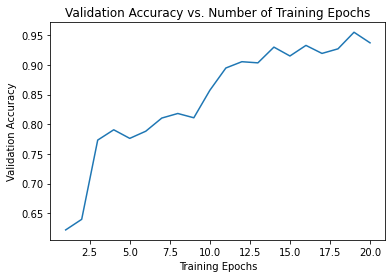

In [ ]:
plt.title("Validation Accuracy vs. Number of Training Epochs")

plt.xlabel("Training Epochs")
plt.ylabel("Validation Accuracy")

plt.plot(range(1,num_epochs+1),hist,label="Pretrained")

plt.show()

In [ ]:
# plt.title("Validation Accuracy vs. learning rates")

# plt.xlabel("learning rates")
# plt.ylabel("Validation Accuracy")

# plt.plot(lr_his,hist,label="Pretrained")

# plt.show()

In [ ]:
y_pred,y_true = test_model(model_ft,data_dict['val'],criterion)

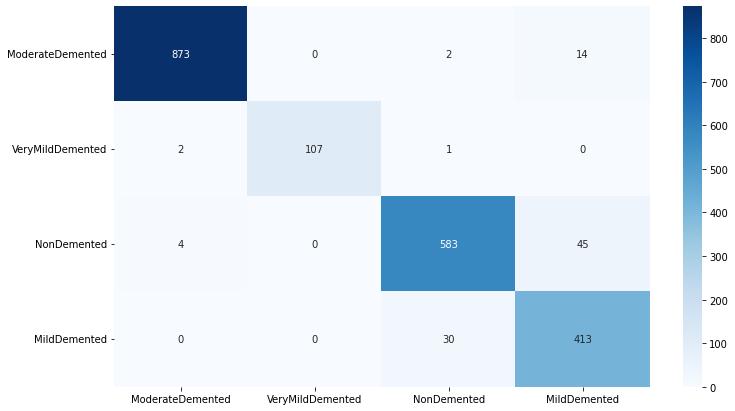

In [ ]:
# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix, index = [i for i in labels_name ],
                     columns = [i for i in labels_name])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True,fmt="d",cmap='Blues')
plt.savefig('output.png')

In [ ]:
print (labels_name)

['ModerateDemented', 'VeryMildDemented', 'NonDemented', 'MildDemented']


In [ ]:
cm = confusion_matrix(y_true, y_pred)
per_class_accuracies = {}
per_class_precision={}
for i, cls in enumerate(labels_name):

    true_negatives = np.sum(np.delete(np.delete(cm, i, axis=0), i, axis=1))
    true_positives = cm[i, i]
    false_negatives=cm[i].sum()-cm[i,i]
    false_positives=cm.T[i].sum() - cm[i,i]


    per_class_accuracies[i] = (true_positives + true_negatives) / np.sum(cm)



In [ ]:
per_class_accuracies

{0: 0.9893924783027965,
 1: 0.9985535197685632,
 2: 0.9604628736740598,
 3: 0.9570877531340405}

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       889
           1       1.00      0.97      0.99       110
           2       0.95      0.92      0.93       632
           3       0.88      0.93      0.90       443

    accuracy                           0.95      2074
   macro avg       0.95      0.95      0.95      2074
weighted avg       0.95      0.95      0.95      2074

